<a href="https://colab.research.google.com/github/programmingboy/shoppify/blob/main/shopify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Google Colab file is intended for Shoppify Data Science intern challenge.

# The first question is

-------------------------------------------------------------
Question 1: Given some sample data, write a program to answer the following:  [click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0
)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


a.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

b.   What metric would you report for this dataset?

c.   What is its value? 

 




Importing Some necessary library

## a.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt #for plotting

Import Dataset

In [2]:
url = "https://raw.githubusercontent.com/programmingboy/shoppify/main/2019%20Winter%20Data%20Science%20Intern%20Challenge%20Data%20Set%20-%20Sheet1.csv"
df = pd.read_csv(url)
df.describe()         # Gives the information about the dataset

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In the dataset, AOV is 3145.128000 which according to the question is higher than the accepted.  This can be caused by incorrect information or a repeated entry in the dataset. In this dataset, the value of standard deviation is too high which means the mean is not an accurate measure. And it may be caused by some mistake in higher-value data. The higher AOV value can be caused by some outliers (exceptional cases).

To confirm our hypothesis, we use the box plot function to plot a graph. In the graph we can see the value at 700000 which affect the mean measure

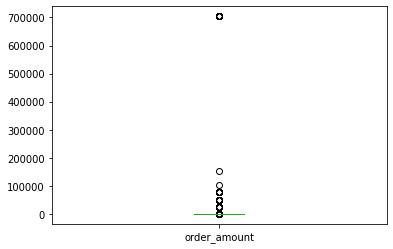

In [3]:
plt.figure();
df['order_amount'].plot.box()

From the boxplot, it is clear that there are lots of outliers who push the mean AOV higher. To clear more doubts regarding the repeated value, we can collect the repeated value and how many time it's repeated.

---



In [4]:
distinct_value = df.groupby(['order_amount']).size().reset_index(name='Repeated Times').sort_values(by='order_amount', ascending=False)
distinct_value.head(20)

,order_amount,Repeated Times
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Values 704000, 51450, 25725 are repeated more often than the other values. Thus, this value requires more insightsThus, this value requires more insights.

In [5]:
df.loc[df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


It's interesting to note that, in order_amount 704000, all the shoes purchased at the same time which is highly unlikely. Moreover, user_id is same in all the entries. That means, one user purchase the same shoes at the same time but on different dates. which means, we can't say that the entry is repeated. But, we can solve this result by removing the outliers or splitting the data into two parts

We divided the dataset into two parts to avoid outliers.  The first part contains an order value lower than 150000. The other part contains a value higher than 150000.

In [6]:
df1 = df[df['order_amount'] < 150000]
df2 = df[df['order_amount'] >= 150000]


In [7]:
df1.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,2501.423525,50.100763,849.912686,723.261742,1.993175
std,1443.007416,29.051946,86.808108,4848.500488,0.981639
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1251.250000,24.000000,776.000000,163.000000,1.000000
50%,2502.500000,50.000000,850.000000,284.000000,2.000000
75%,3750.750000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,102900.000000,8.000000


In [8]:
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2244.888889,44.000000,622.055556,673463.888889,1889.222222
std,1603.251582,8.485281,63.875313,129553.747426,469.990307
min,16.000000,42.000000,607.000000,154350.000000,6.000000
25%,1169.500000,42.000000,607.000000,704000.000000,2000.000000
50%,1878.500000,42.000000,607.000000,704000.000000,2000.000000
75%,3242.250000,42.000000,607.000000,704000.000000,2000.000000
max,4883.000000,78.000000,878.000000,704000.000000,2000.000000


## b.   What metric would you report for this dataset?

I prefer the median measure more than the mean rank for this dataset because Outliers affect the mean value of the data but have a negligible effect on the median or mode of a given set of data.


## c. What is its value?


284

# The Second Question is

For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?

b. What is the last name of the employee with the most orders?

c. What product was ordered the most by customers in Germany?


# *a. How many orders were shipped by Speedy Express in total?*

SELECT COUNT(*) AS NumberOfOrders
FROM [Orders]
JOIN [Shippers]
    ON [Shippers].ShipperID = [Orders].ShipperID
WHERE [Shippers].ShipperName = 'Speedy Express'


The answer is **54**

## b. What is the last name of the employee with the most orders?

SELECT [Employees].LastName, COUNT(*) AS NumberOfOrders
FROM [Orders]
JOIN [Employees]
ON [Orders].EmployeeID = [Employees].EmployeeID
GROUP BY [Employees].LastName
ORDER BY NumberOfOrders DESC
LIMIT 1

The answer is 40

## c. What product was ordered the most by customers in Germany?

SELECT [Products].ProductName,
    SUM([OrderDetails].Quantity) AS "TotalOrdered"
FROM [Orders]
JOIN [Customers]
    ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
    ON [OrderDetails].OrderID = [Orders].OrderID
JOIN [Products]
    ON [Products].ProductID = [OrderDetails].ProductID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY TotalOrdered DESC --

The Answer is 160